# Teste de Normalização e Padronização

## TL;DR
Teste de Normalização/Padronização dos dados para escolha do melhor método 

## Objetivo

Entender os tipos de norm/padro existentes e qual deverimos usar para nosso caso

## Dados

CSV's

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. Escolhemos usar o StandardScaler


## Observações importantes:
1. Achamos necessário criar um notebook que irá compor as formas que devemos desenvolver o tratamento com os dados Faltantes.
(criação do notebook Ajsute de séries.)

## Import da Biblioteca

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
)



In [44]:
df = pd.read_csv('../../data/rafaelDB.csv')

##### Plot dos dados

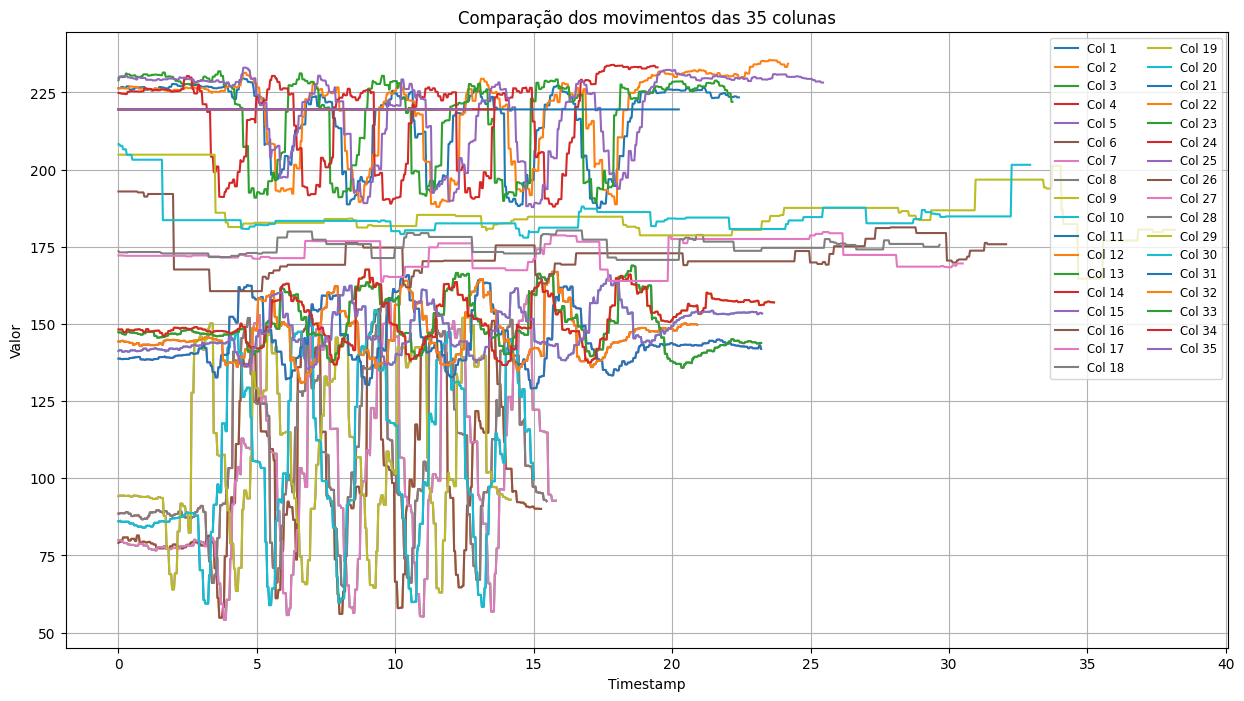

In [45]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

## Usando método de Trim (Cut) para tratar os dados NaN's 

In [46]:
# Separa timestamp e sensores
timestamp = df.iloc[:, 0]
dados = df.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())

Menor tamanho válido: 344
(344, 36)
   timestamp   Vol1Ex1   Vol1Ex2   Vol1Ex3   Vol1Ex4   Vol1Ex5   Vol2Ex1  \
0     0.0000  86.05160  79.04637  79.92158  88.55168  94.18597  144.2986   
1     0.0334  86.05160  79.42403  79.92158  88.55168  94.36861  144.2986   
2     0.0668  86.24536  79.42403  79.92158  88.72372  94.36861  144.2986   
3     0.1002  85.88944  79.42403  79.92158  88.72372  94.36861  144.4738   
4     0.1336  85.88944  79.89925  79.41667  88.72372  94.40106  144.5396   

    Vol2Ex2   Vol2Ex3   Vol2Ex4  ...   Vol6Ex1   Vol6Ex2   Vol6Ex3   Vol6Ex4  \
0  138.7671  147.3392  148.2097  ...  192.9248  172.1902  173.6004  204.8451   
1  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
2  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
3  138.6201  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
4  138.6201  146.8200  148.2097  ...  192.9248  172.1767  173.1956  204.8451   

    Vol6Ex5   Vol7Ex1   Vo

## Plot dos dados após tratamento trim

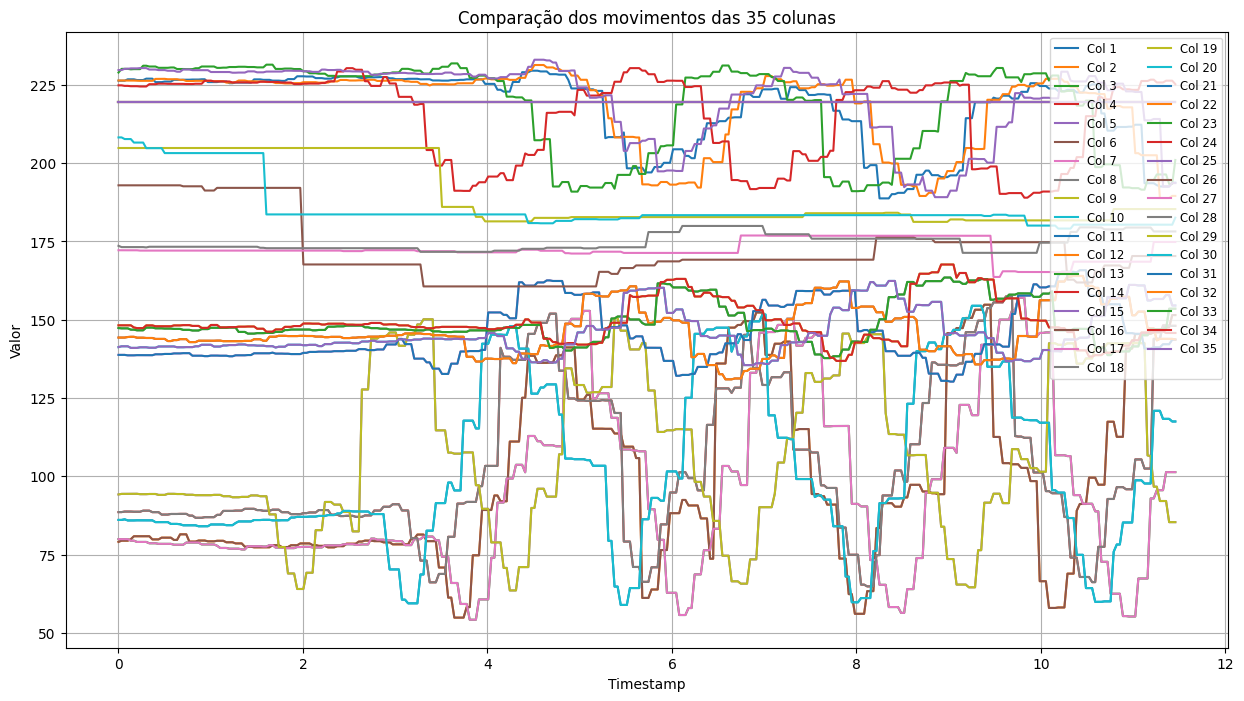

In [47]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df_final.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df_final.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

## Transposição da matriz 

In [48]:
 
df = df_final.T
df

0          1          2          3          4          5    \
timestamp    0.00000    0.03340    0.06680    0.10020    0.13360    0.16700   
Vol1Ex1     86.05160   86.05160   86.24536   85.88944   85.88944   85.88944   
Vol1Ex2     79.04637   79.42403   79.42403   79.42403   79.89925   80.83653   
Vol1Ex3     79.92158   79.92158   79.92158   79.92158   79.41667   79.41667   
Vol1Ex4     88.55168   88.55168   88.72372   88.72372   88.72372   88.67191   
Vol1Ex5     94.18597   94.36861   94.36861   94.36861   94.40106   94.40106   
Vol2Ex1    144.29860  144.29860  144.29860  144.47380  144.53960  144.53960   
Vol2Ex2    138.76710  138.76710  138.76710  138.62010  138.62010  138.62010   
Vol2Ex3    147.33920  147.23790  147.23790  147.23790  146.82000  146.82000   
Vol2Ex4    148.20970  148.20970  148.20970  148.20970  148.20970  147.52790   
Vol2Ex5    141.24940  141.50810  141.50810  141.50810  141.00380  141.00380   
Vol3Ex1    226.35060  226.35060  226.35060  226.78470  226.78470  226.78470   
Vol3Ex2    226.40120  226.40120  226.38420  226.38420  226.38420  226.38420   
Vol3Ex3    228.94530  230.12210  230.12210  230.12210  229.96550  230.03620   
Vol3Ex4    224.85850  224.85850  224.68430  224.68430  224.58080  224.58080   
Vol3Ex5    229.73760  229.73760  230.13960  230.13960  230.27820  230.27820   
Vol4Ex1     79.04637   79.42403   79.42403   79.42403   79.89925   80.83653   
Vol4Ex2     79.92158   79.92158   79.92158   79.92158   79.41667   79.41667   
Vol4Ex3     88.55168   88.55168   88.72372   88.72372   88.72372   88.67191   
Vol4Ex4     94.18597   94.36861   94.36861   94.36861   94.40106   94.40106   
Vol4Ex5     86.05160   86.05160   86.24536   85.88944   85.88944   85.88944   
Vol5Ex1    138.76710  138.76710  138.76710  138.62010  138.62010  138.62010   
Vol5Ex2    144.29860  144.29860  144.29860  144.47380  144.53960  144.53960   
Vol5Ex3    147.33920  147.23790  147.23790  147.23790  146.82000  146.82000   
Vol5Ex4    148.20970  148.20970  148.20970  148.20970  148.20970  147.52790   
Vol5Ex5    141.24940  141.50810  141.50810  141.50810  141.00380  141.00380   
Vol6Ex1    192.92480  192.92480  192.92480  192.92480  192.92480  192.92480   
Vol6Ex2    172.19020  172.17670  172.17670  172.17670  172.17670  172.17670   
Vol6Ex3    173.60040  173.19560  173.19560  173.19560  173.19560  173.19560   
Vol6Ex4    204.84510  204.84510  204.84510  204.84510  204.84510  204.84510   
Vol6Ex5    208.22560  208.22560  207.70240  207.70240  207.70240  206.58030   
Vol7Ex1    219.51070  219.51070  219.51070  219.51070  219.51070  219.51070   
Vol7Ex2    219.51070  219.51070  219.51070  219.51070  219.51070  219.51070   
Vol7Ex3    219.51070  219.51070  219.51070  219.51070  219.51070  219.51070   
Vol7Ex4    219.51070  219.51070  219.51070  219.51070  219.51070  219.51070   
Vol7Ex5    219.51070  219.51070  219.51070  219.51070  219.51070  219.51070   

                 6          7          8          9    ...        334  \
timestamp    0.20040    0.23380    0.26720    0.30060  ...   11.15560   
Vol1Ex1     85.92782   85.92782   85.92782   85.91203  ...   97.68756   
Vol1Ex2     80.83653   80.83653   80.84084   80.84084  ...  145.50160   
Vol1Ex3     79.02091   79.02091   79.02091   79.02091  ...   67.34228   
Vol1Ex4     88.67191   88.67191   89.01524   89.01524  ...  102.45950   
Vol1Ex5     94.40106   94.27642   94.27642   94.27642  ...  106.65020   
Vol2Ex1    144.25480  144.25480  144.25480  144.16310  ...  147.24300   
Vol2Ex2    138.68090  138.68090  138.68090  138.66650  ...  140.78490   
Vol2Ex3    146.61340  146.61340  146.61340  147.48220  ...  145.04020   
Vol2Ex4    147.31900  147.31900  147.31900  148.18790  ...  145.90460   
Vol2Ex5    141.00380  141.18930  141.18930  141.18930  ...  156.14070   
Vol3Ex1    226.54910  226.54910  226.54910  226.99620  ...  193.59370   
Vol3Ex2    226.34390  226.30190  226.30190  226.30190  ...  202.53730   
Vol3Ex3    230.03620  230.03620  231.12750  231.12750  ...  194.63590  

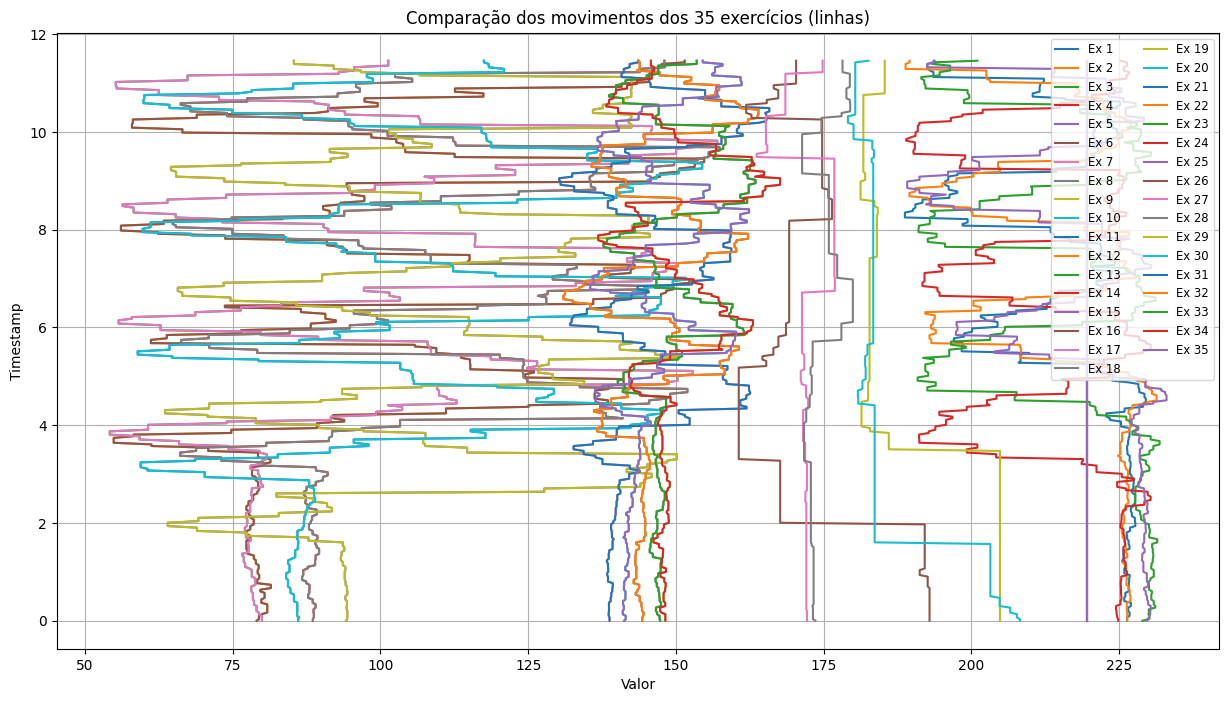

In [49]:
# O novo df tem timestamp como primeira linha (índice 0)
timestamp = df.iloc[0].values

plt.figure(figsize=(15, 8))

# As linhas 1 a 35 são os sensores (exercícios, colunas originais)
for i in range(1, 36):
    plt.plot(df.iloc[i].values, timestamp, label=f'Ex {i}')

plt.xlabel('Valor')
plt.ylabel('Timestamp')
plt.title('Comparação dos movimentos dos 35 exercícios (linhas)')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

## Aplicação dos método de K-Means nos tipos de Padronização/ Normalização  

In [50]:

# Considerando que df já foi definido como df_final.T

# 1. Separar os dados (excluindo a linha do timestamp)
X_raw = df.iloc[1:].values  # shape: (n_exercicios, n_timestamps)

# 2. Dicionário com os scalers
scalers = {
    'raw':       None,
    'standard':  StandardScaler(),
    'minmax':    MinMaxScaler(),
    'maxabs':    MaxAbsScaler(),
    'robust':    RobustScaler(),
    'normalizer': Normalizer()
}

# 3. Definir número de clusters
k = 4

# 4. Aplicar K-means para cada tipo de normalização
results = {}

for name, scaler in scalers.items():
    if scaler is None:
        X_scaled = X_raw  # sem normalização
    else:
        X_scaled = scaler.fit_transform(X_raw)
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Armazenar os resultados
    results[name] = {
        'X': X_scaled,
        'clusters': clusters
    }
    
    print(f"[OK] Clusterização com '{name}' concluída.")

# Exemplo: acessar os clusters do método "standard"
# clusters_std = results['standard']['clusters']


[OK] Clusterização com 'raw' concluída.
[OK] Clusterização com 'standard' concluída.
[OK] Clusterização com 'minmax' concluída.
[OK] Clusterização com 'maxabs' concluída.
[OK] Clusterização com 'robust' concluída.
[OK] Clusterização com 'normalizer' concluída.


## Plot dos dados com cada Normalização/Padronização

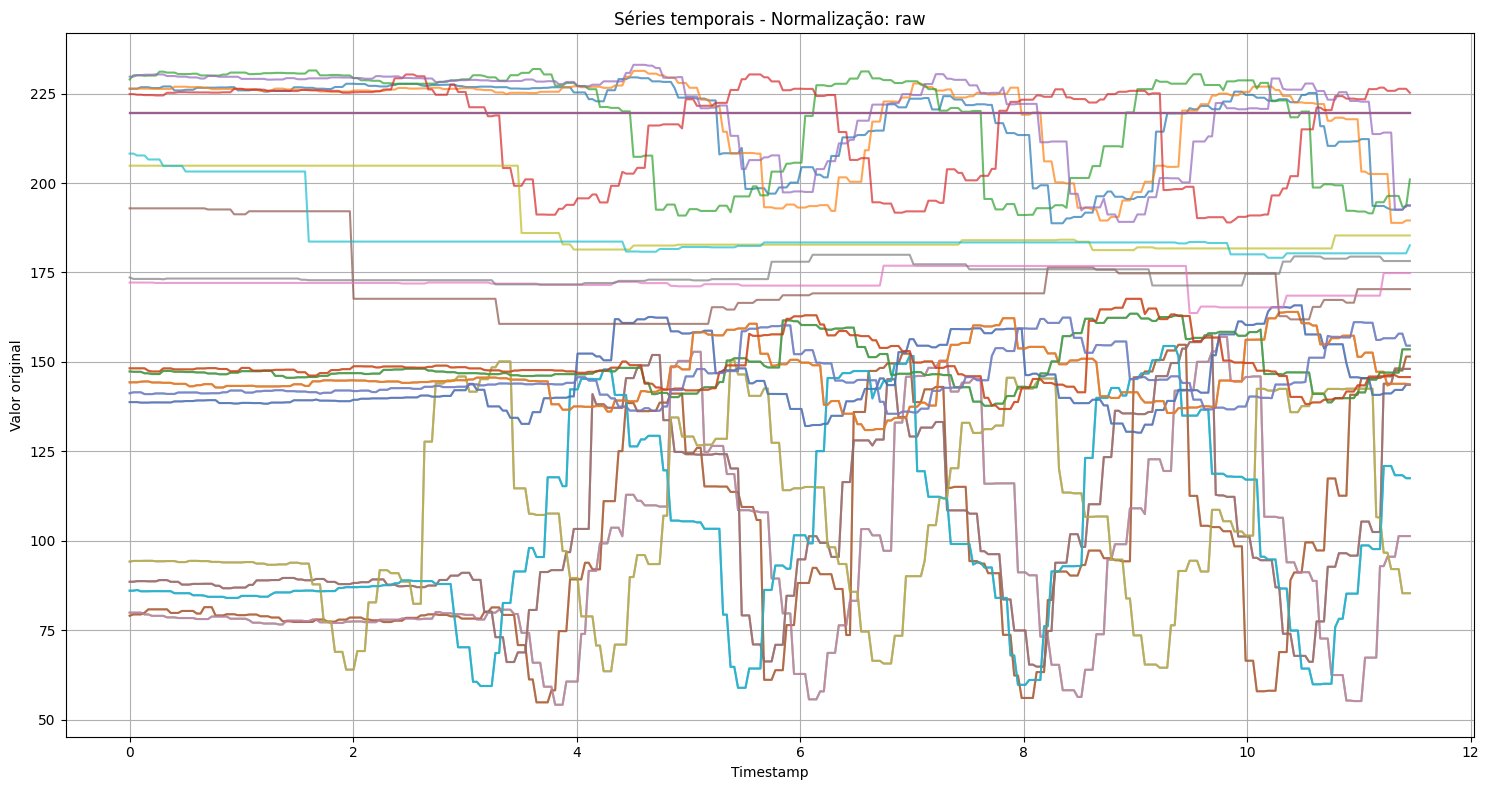

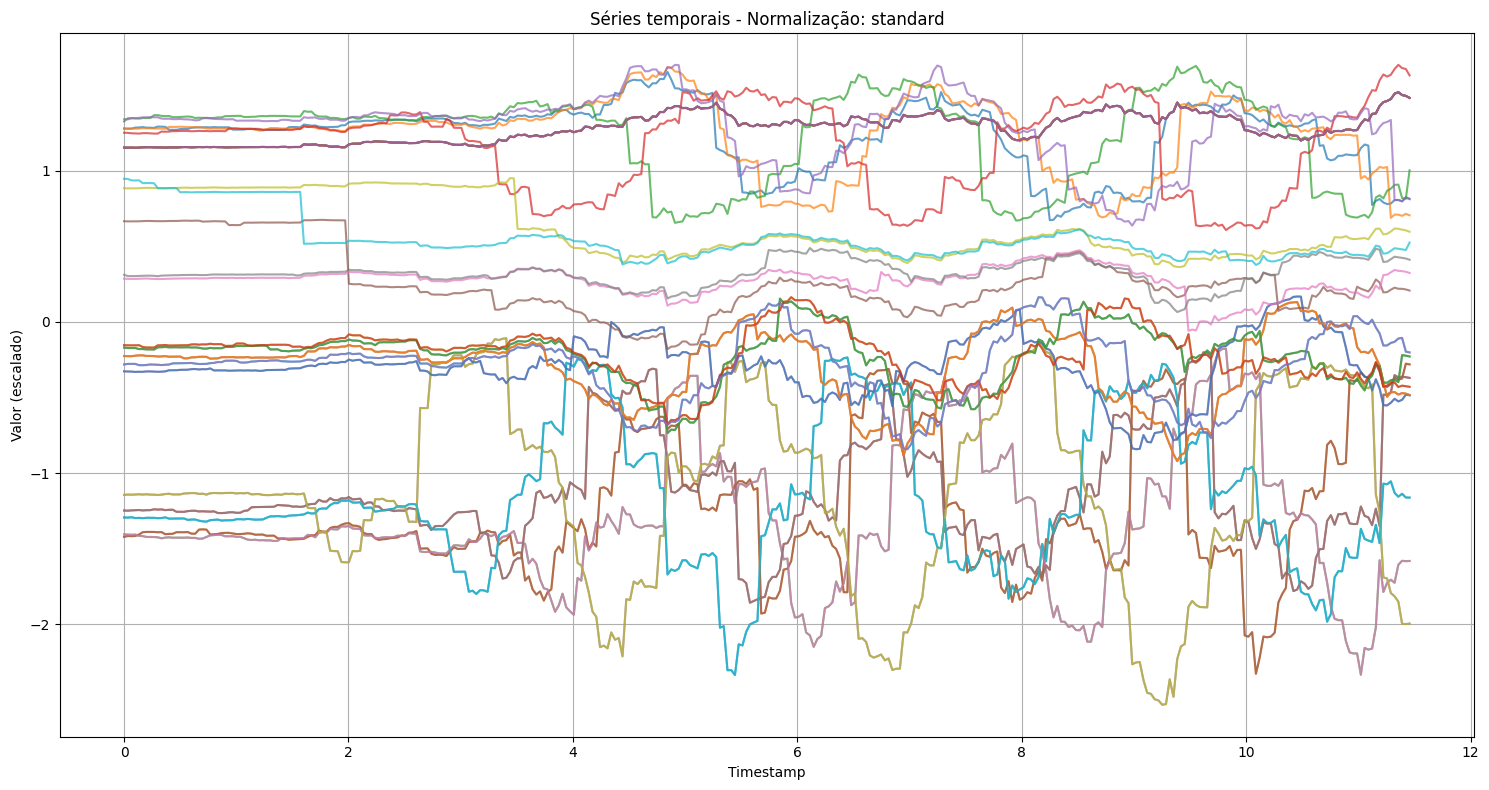

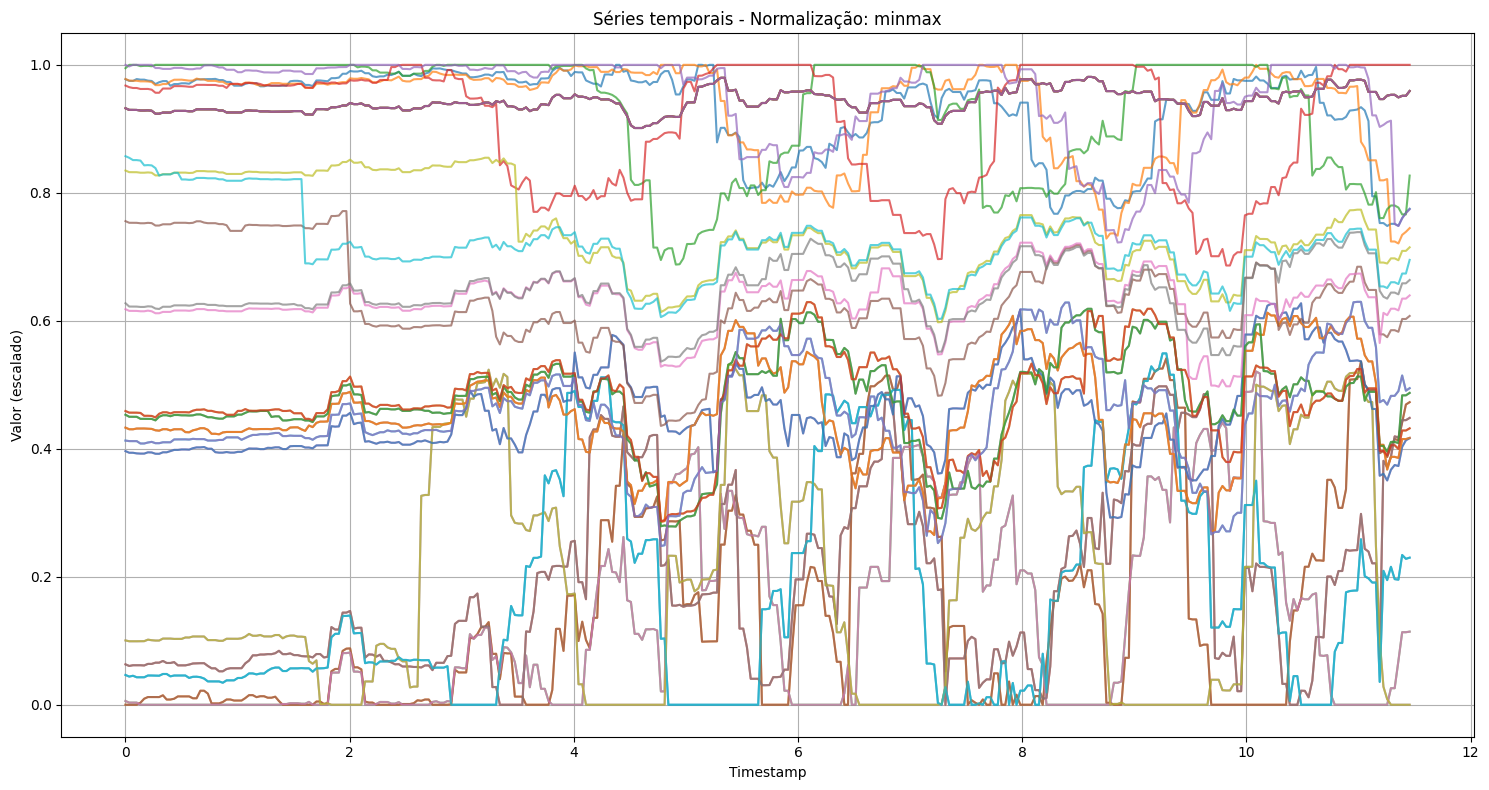

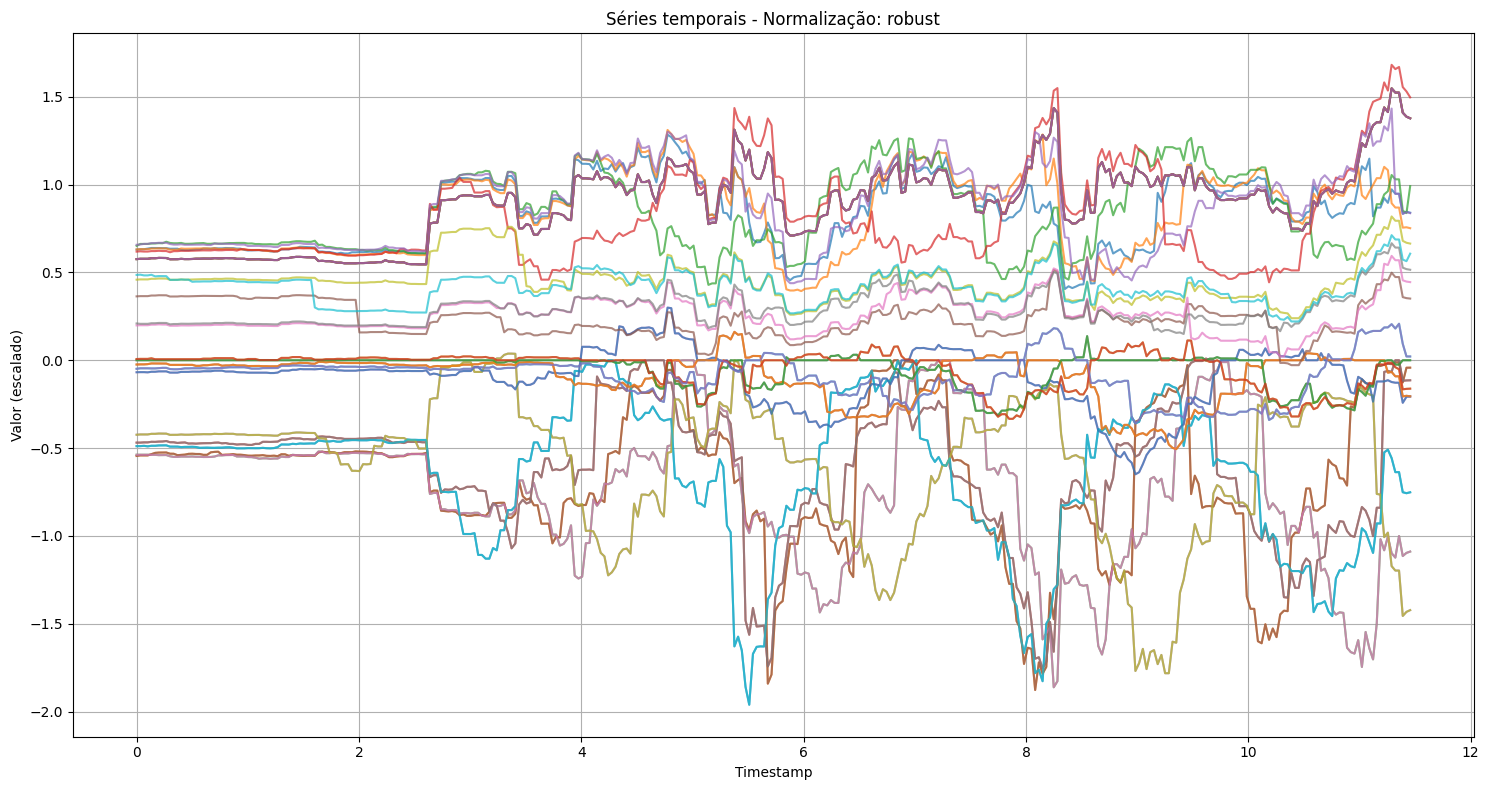

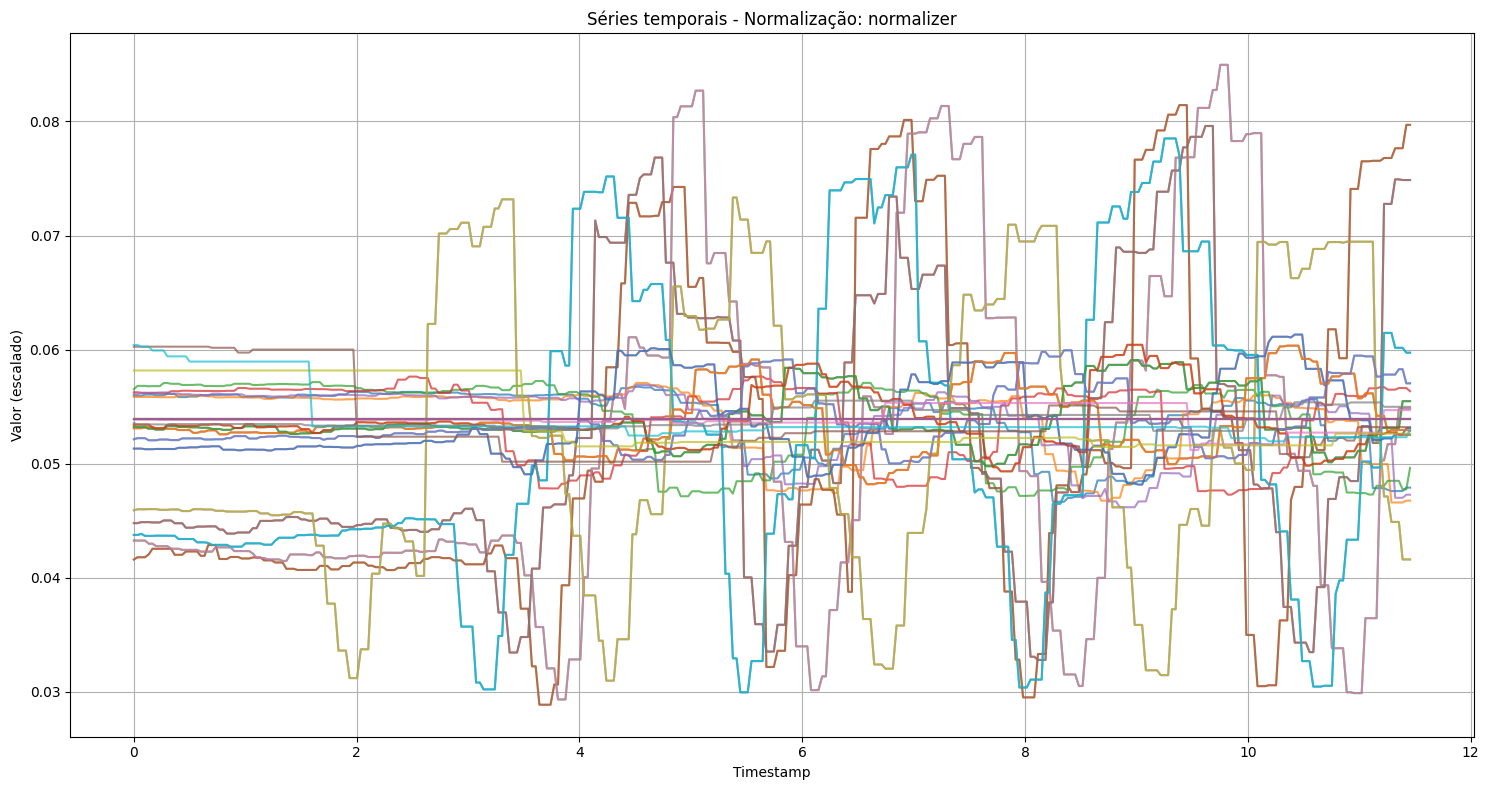

In [51]:
# timestamp (assumindo que a primeira linha de df é o timestamp)
timestamp = df.iloc[0].values

# Loop para cada método de normalização
for name, result in results.items():
    X_scaled = result['X']

    plt.figure(figsize=(15, 8))

    for serie in X_scaled:
        plt.plot(timestamp, serie, alpha=0.7)

    plt.xlabel('Timestamp')
    plt.ylabel('Valor (escalado)' if name != 'raw' else 'Valor original')
    plt.title(f'Séries temporais - Normalização: {name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Plot dos dados com cada Normalização/Padronização

C:\Users\Yama\AppData\Local\Temp\ipykernel_16064\1550039521.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', k)


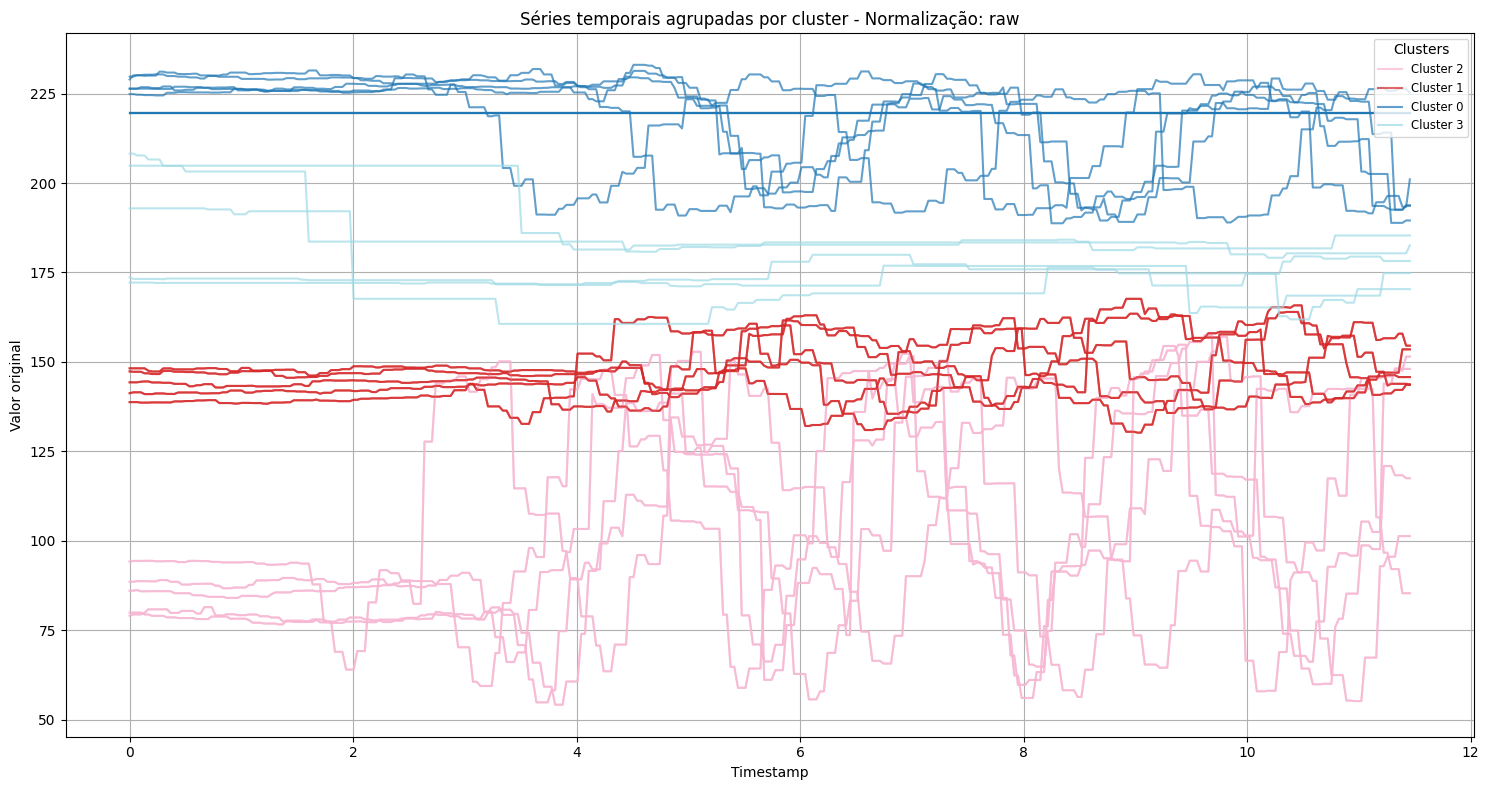

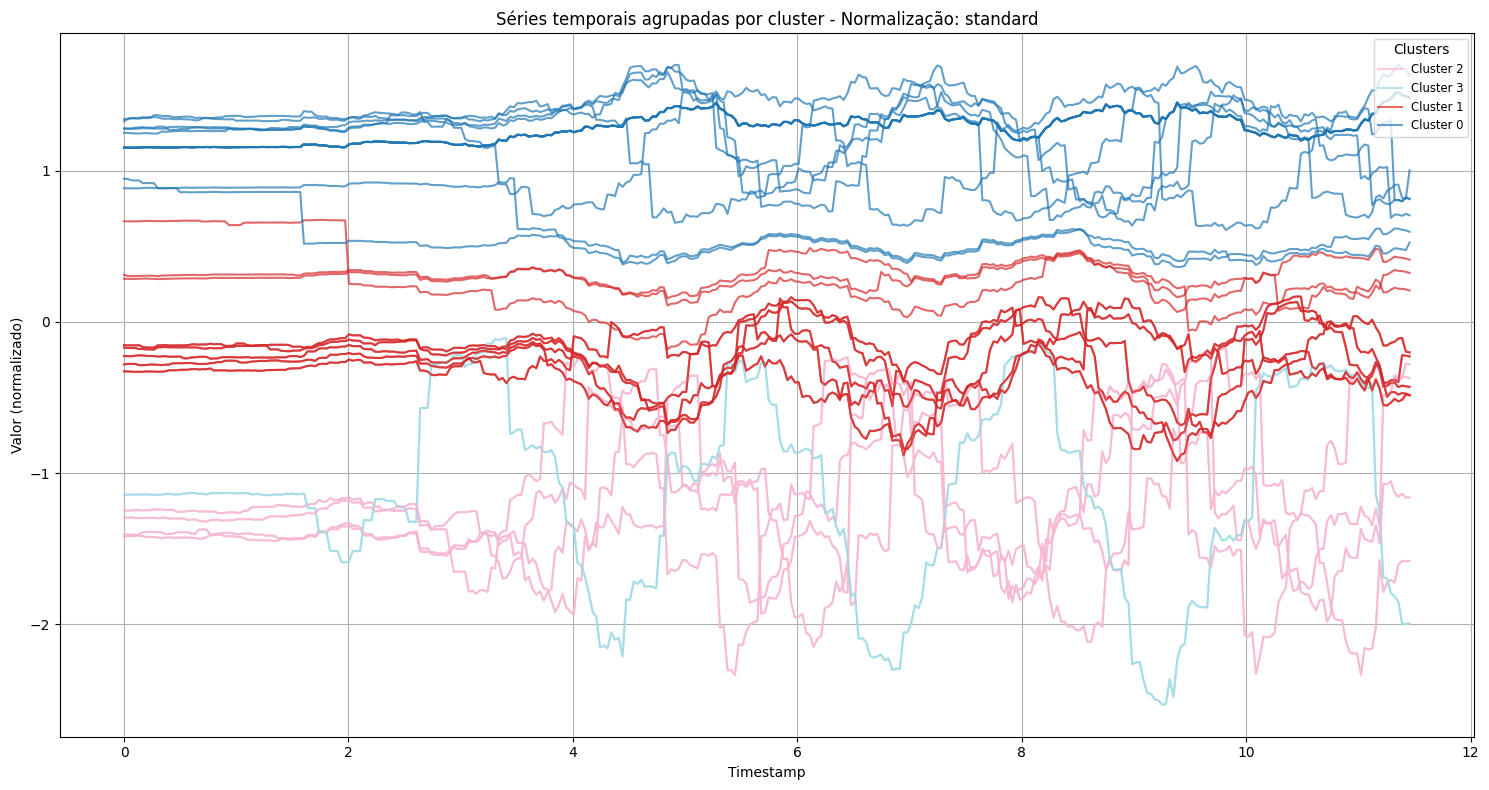

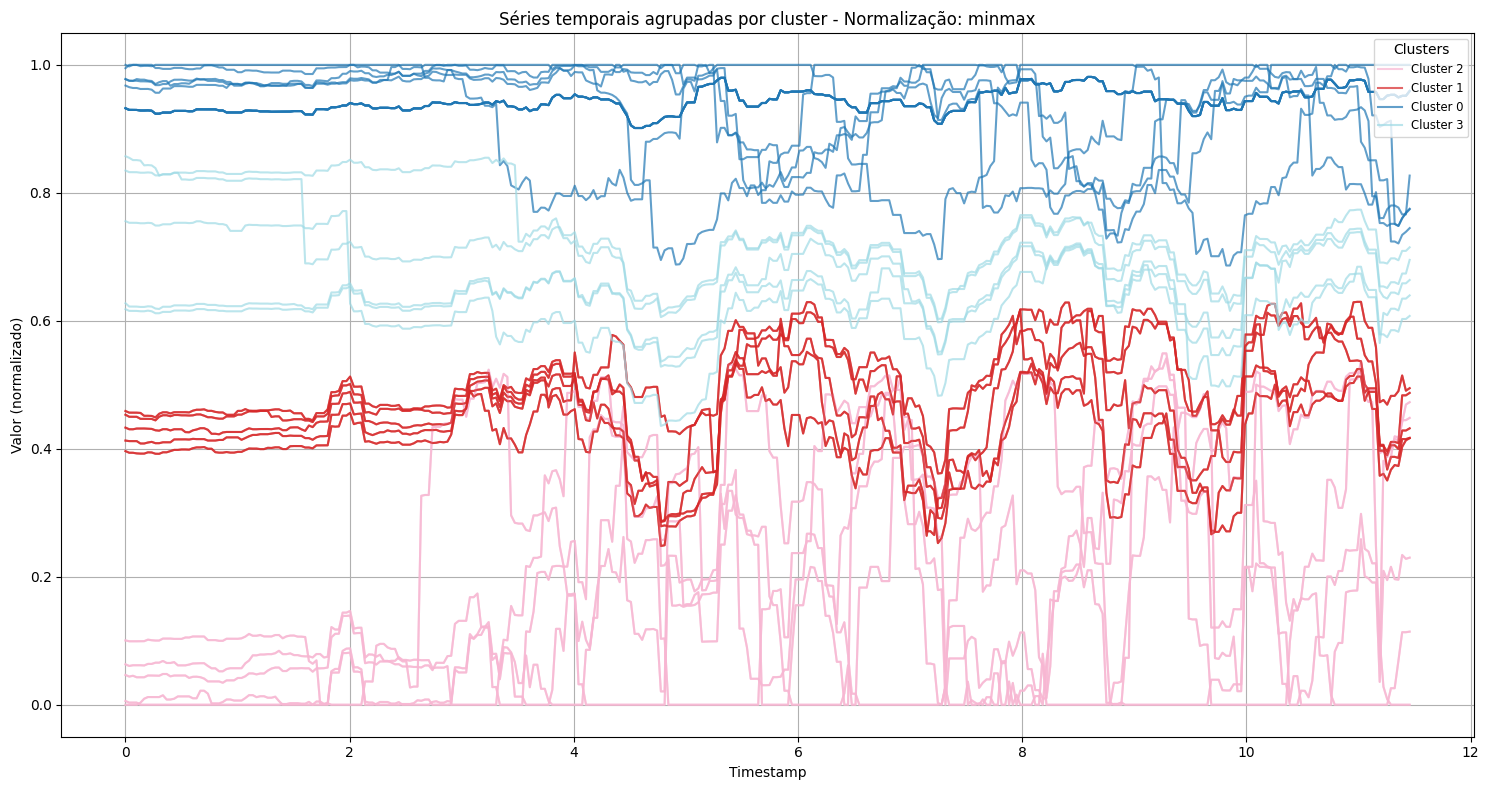

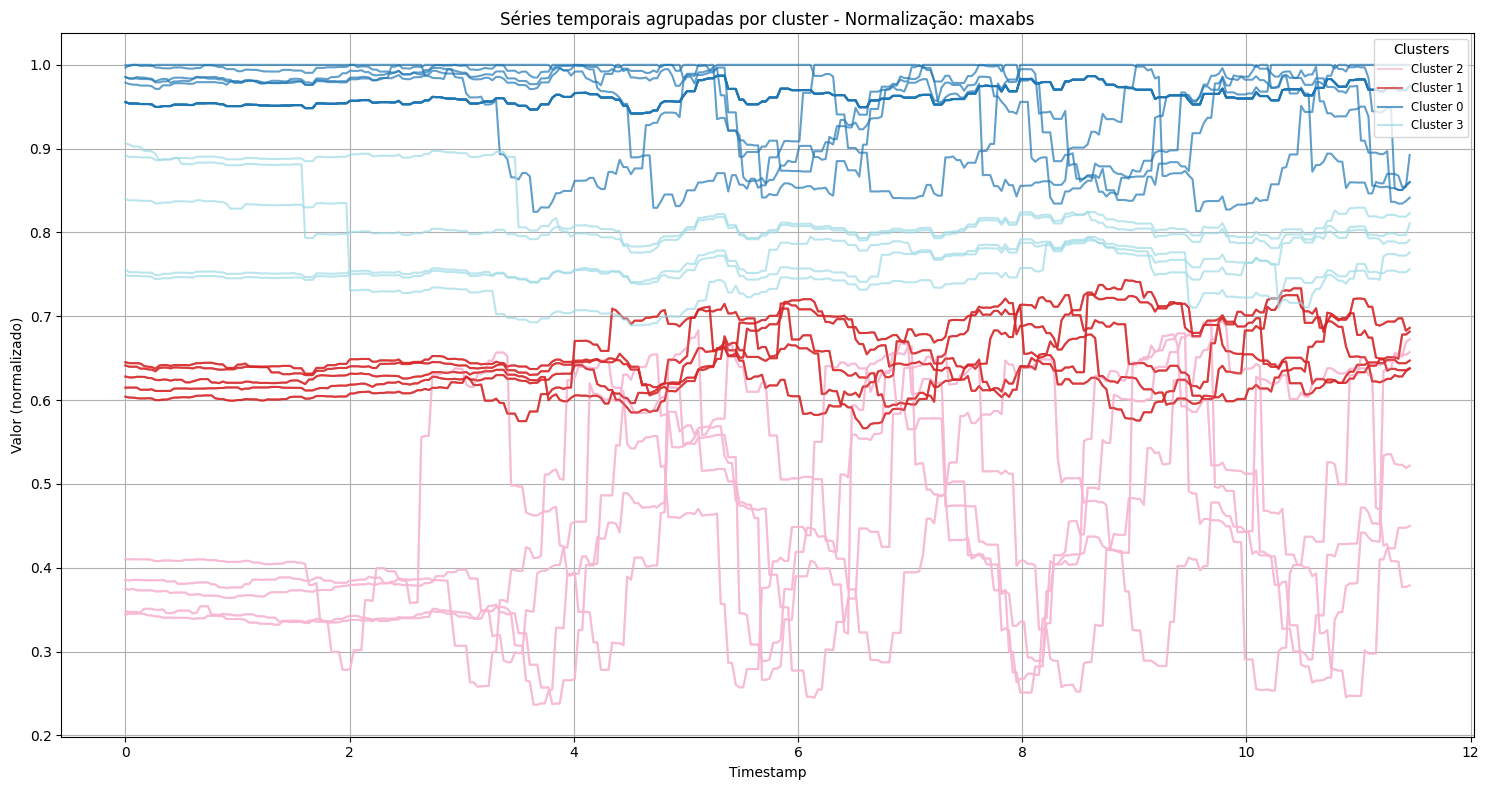

In [52]:
# timestamp (eixo X)
timestamp = df.iloc[0].values

# Mapa de cores com até 20 clusters distintos
cmap = cm.get_cmap('tab20', k)

# Loop para cada tipo de normalização
for name, result in results.items():
    series = result['X']
    clusters = result['clusters']

    plt.figure(figsize=(15, 8))
    for i, serie in enumerate(series):
        cluster_id = clusters[i]
        # Adiciona legenda apenas uma vez por cluster
        label = f'Cluster {cluster_id}' if list(clusters).index(cluster_id) == i else None
        plt.plot(timestamp, serie, color=cmap(cluster_id), alpha=0.7, label=label)

    plt.xlabel('Timestamp')
    plt.ylabel('Valor (normalizado)' if name != 'raw' else 'Valor original')
    plt.title(f'Séries temporais agrupadas por cluster - Normalização: {name}')
    plt.grid(True)
    plt.legend(title='Clusters', fontsize='small', loc='upper right')
    plt.tight_layout()
    plt.show()


C:\Users\Yama\AppData\Local\Temp\ipykernel_16064\45158303.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', k)


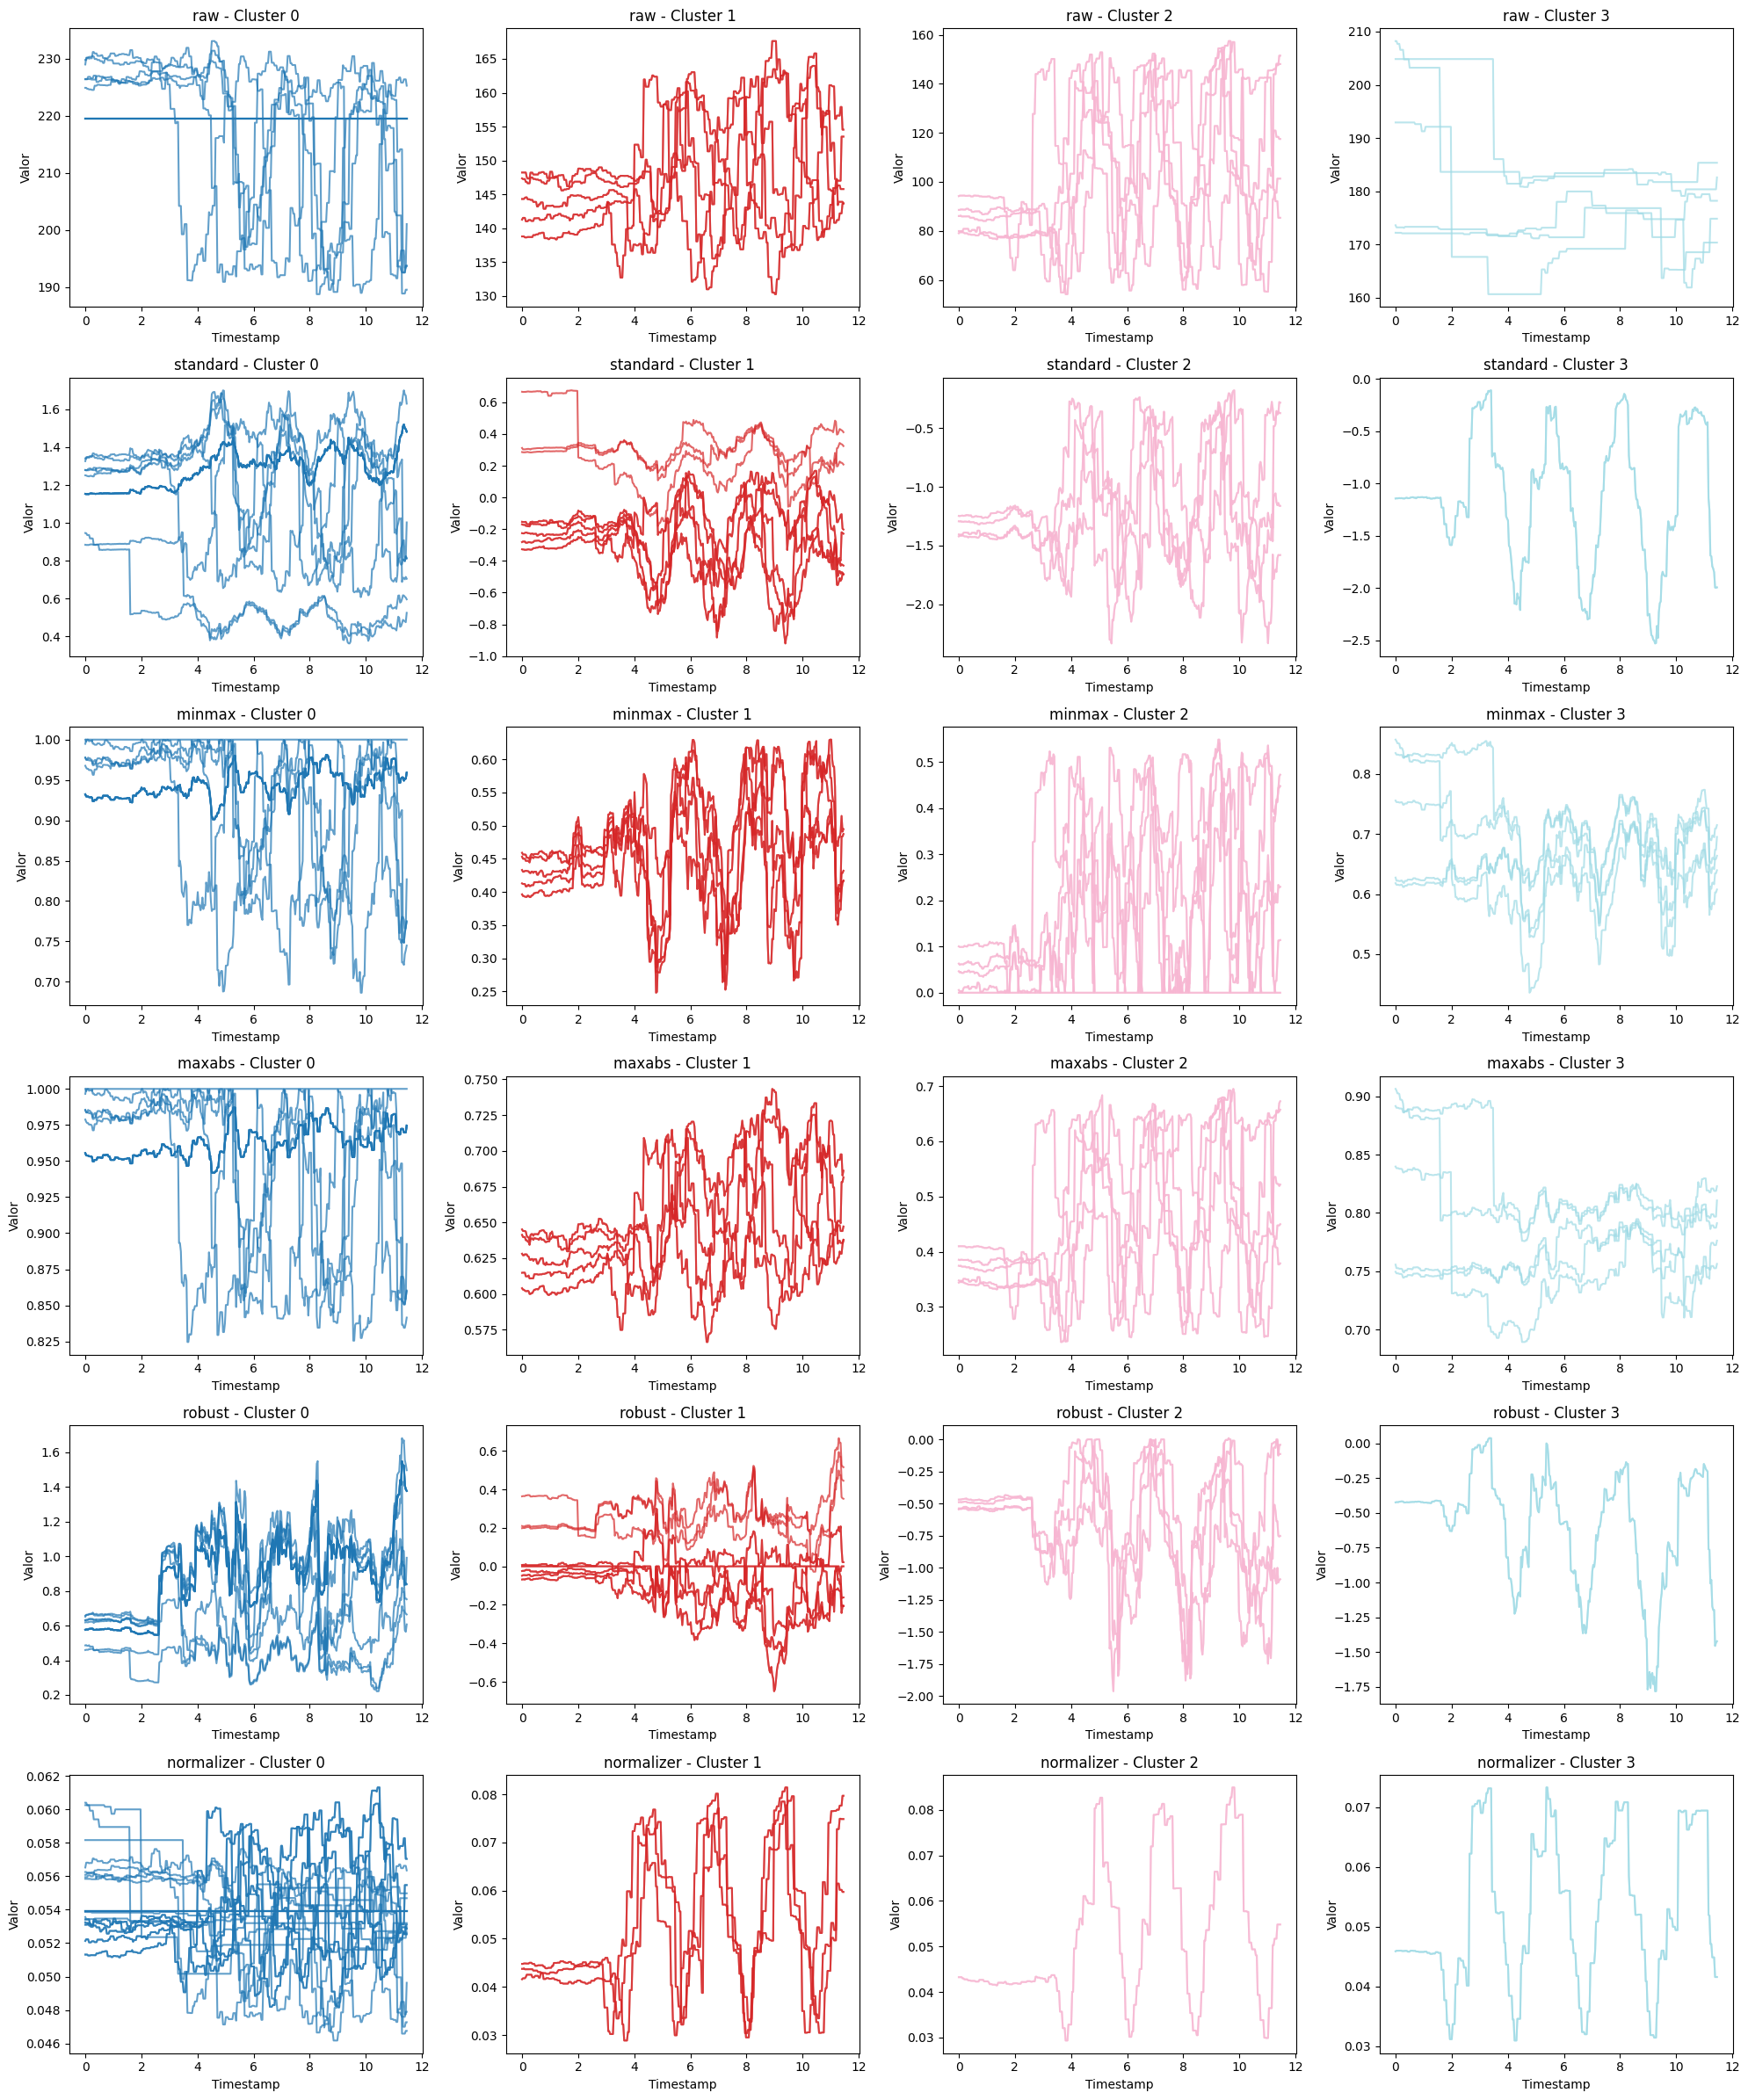

In [53]:
# timestamp (eixo X)
timestamp = df.iloc[0].values

# Cria o colormap com até 20 cores distintas
cmap = cm.get_cmap('tab20', k)

# Número de clusters e normalizações
n_normalizacoes = len(results)
fig, axes = plt.subplots(n_normalizacoes, k, figsize=(5 * k, 4 * n_normalizacoes), squeeze=False)

# Loop por tipo de normalização
for row_idx, (name, result) in enumerate(results.items()):
    series = result['X']
    clusters = result['clusters']

    # Para cada cluster, plotar no subplot correspondente
    for cluster_id in range(k):
        ax = axes[row_idx][cluster_id]
        indices = np.where(clusters == cluster_id)[0]
        color = cmap(cluster_id)

        for i in indices:
            ax.plot(timestamp, series[i], color=color, alpha=0.7)

        ax.set_title(f'{name} - Cluster {cluster_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()


# Conclusões

Como observamos a forma de tratar os dados foi notada como importancia e a normalização decidimos usar o standart o qual foi recomendado pelo orientador pois seria a mais adequada. 

Foi mencionado que deveriamos criar um notebook que fara os tipos de tratamento dos dados com os valores NaN's